In [1]:
import matplotlib.pyplot as plt
import sys, os, glob

In [2]:
metrics = {}
files = glob.glob("./*.csv")

In [3]:
print files

['./multifit_gpu.csv', './multifit_cpu.csv', './legacy_multifit_cpu.csv', './legacy_multifit_gpu.csv']


In [4]:
for f in files:
    with open(f, "r") as fin:
        label = f[2:-4]
        print label
        line = fin.readline()
        metrics[label] = map(float, line.rstrip().split(','))

multifit_gpu
multifit_cpu
legacy_multifit_cpu
legacy_multifit_gpu


In [5]:
print metrics

{'legacy_multifit_gpu': [3.11111, 4.22222, 7.0, 11.0, 19.0, 38.0, 76.0], 'multifit_cpu': [4.0, 8.2, 17.0, 34.2, 68.0, 136.3, 277.7], 'legacy_multifit_cpu': [5.0, 11.0, 23.1, 53.8, 92.0, 185.1, 369.3], 'multifit_gpu': [2.77778, 3.11111, 6.0, 10.0, 17.5556, 34.5556, 68.7778]}


/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


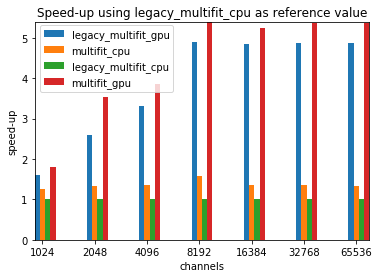

In [6]:
channels = [2 ** x for x in range(10, 17)]
format = 'pdf'

fig = plt.figure()
ax = plt.axes()
ax = plt.subplot(111)
w = 0.1 
base_label = "legacy_multifit_cpu"
x = list(range(len(metrics[base_label])))
    
# ax.set_xticks(x)
for label in metrics:
    ax.bar(x, [(a/b) for a, b in zip(metrics[base_label],
                                     metrics[label])], width=w, label=label, align='center')
    x = [x + w for x in x]

ax.set_ylabel('speed-up')
ax.set_xlabel('channels')
ax.set_xticks([x-(len(channels)/2 * w) for x in x])
ax.set_xticklabels(channels)
ax.autoscale(tight=True)
ax.set_title('Speed-up using legacy_multifit_cpu as reference value')
ax.legend(loc='upper left' , bbox_to_anchor=(0.0001, 1.01))

# ax.legend(loc='upper left')
fig.savefig('bar_plot.'+format, format=format)
plt.show()